### Exploratory Data Analysis Using COVID 19 Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid19_data=pd.read_csv('covid19_data_mar.csv')
covid19_data.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,incubationdays,hospitaldays,visiting Wuhan,from Wuhan,death,recovered,symptom
0,195,NaN,1/27/2020,Hubei,China,female,28.0,1/7/2020,0.0,1/10/2020,NaN,NaN,#VALUE!,3,0,1,NaN,NaN,"fever, cough, difficult in breathing"
1,196,NaN,1/27/2020,Hubei,China,female,51.0,NaN,NaN,1/11/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,"fever, cough, difficult in breathing"
2,197,NaN,1/27/2020,Shandong,China,male,37.0,NaN,NaN,1/17/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,fever
3,237,1.0,1/15/2020,Kanagawa,Japan,male,35.0,1/3/2020,0.0,1/6/2020,NaN,1/6/2020,#VALUE!,3,1,0,NaN,1/15/2020,fever
4,241,5.0,1/28/2020,Aichi Prefecture,Japan,male,45.0,1/22/2020,0.0,1/26/2020,NaN,1/20/2020,#VALUE!,4,0,1,NaN,NaN,fever


In [218]:
print(covid19_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     270 non-null    int64  
 1   case_in_country        267 non-null    float64
 2   reporting date         270 non-null    object 
 3   location               270 non-null    object 
 4   country                270 non-null    object 
 5   gender                 269 non-null    object 
 6   age                    265 non-null    float64
 7   symptom_onset          252 non-null    object 
 8   If_onset_approximated  252 non-null    float64
 9   hosp_visit_date        214 non-null    object 
 10  exposure_start         32 non-null     object 
 11  exposure_end           79 non-null     object 
 12  incubationdays         270 non-null    object 
 13  hospitaldays           270 non-null    object 
 14  visiting Wuhan         270 non-null    int64  
 15  from W

In [219]:
covid19_data.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,incubationdays,hospitaldays,visiting Wuhan,from Wuhan,death,recovered,symptom
0,195,NaN,1/27/2020,Hubei,China,female,28.0,1/7/2020,0.0,1/10/2020,NaN,NaN,#VALUE!,3,0,1,NaN,NaN,"fever, cough, difficult in breathing"
1,196,NaN,1/27/2020,Hubei,China,female,51.0,NaN,NaN,1/11/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,"fever, cough, difficult in breathing"
2,197,NaN,1/27/2020,Shandong,China,male,37.0,NaN,NaN,1/17/2020,NaN,NaN,#VALUE!,#VALUE!,0,1,NaN,NaN,fever
3,237,1.0,1/15/2020,Kanagawa,Japan,male,35.0,1/3/2020,0.0,1/6/2020,NaN,1/6/2020,#VALUE!,3,1,0,NaN,1/15/2020,fever
4,241,5.0,1/28/2020,Aichi Prefecture,Japan,male,45.0,1/22/2020,0.0,1/26/2020,NaN,1/20/2020,#VALUE!,4,0,1,NaN,NaN,fever


In [6]:
covid19_data.isnull()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,incubationdays,hospitaldays,visiting Wuhan,from Wuhan,death,recovered,symptom
0,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False
1,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False
2,False,True,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False
266,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
267,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False
268,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,True,True,False


In [7]:
covid19_data.isnull().sum()

id                         0
case_in_country            3
reporting date             0
location                   0
country                    0
gender                     1
age                        5
symptom_onset             18
If_onset_approximated     18
hosp_visit_date           56
exposure_start           238
exposure_end             191
incubationdays             0
hospitaldays               0
visiting Wuhan             0
from Wuhan                 0
death                    264
recovered                234
symptom                    0
dtype: int64

In [8]:
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           1.11
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.37
age                       1.85
symptom_onset             6.67
If_onset_approximated     6.67
hosp_visit_date          20.74
exposure_start           88.15
exposure_end             70.74
incubationdays            0.00
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
death                    97.78
recovered                86.67
symptom                   0.00
dtype: float64

In [9]:
#To search for values in all columns
for i in covid19_data.columns:
     covid19_data[i].astype('category').apply(lambda x: print(covid19_data[i].name) if x=='#VALUE!' else 'continue')

incubationdays
hospitaldays


In [ ]:
#covert the objects to numeric data while the objects in the data becomes null
#df['column']=pd.to_numeric(df['column'], errors='coerce')

In [10]:
covid19_data['hospitaldays'].astype('category').value_counts()
covid19_data['incubationdays'].astype('category').value_counts()

#VALUE!    239
6            4
9            4
10           3
5            3
12           2
4            2
7            2
8            2
13           1
18           1
22           1
23           1
-1           1
32           1
34           1
1            1
3            1
Name: incubationdays, dtype: int64

In [11]:
covid19_data=covid19_data.drop('exposure_start', axis=1)
covid19_data=covid19_data.drop('exposure_end', axis=1)
covid19_data=covid19_data.drop('death', axis=1)
covid19_data=covid19_data.drop('recovered', axis=1) 
covid19_data=covid19_data.drop('incubationdays', axis=1)

In [12]:
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           1.11
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.37
age                       1.85
symptom_onset             6.67
If_onset_approximated     6.67
hosp_visit_date          20.74
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
symptom                   0.00
dtype: float64

In [13]:
covid19_data[covid19_data.isnull().sum(axis=1)>=5]

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,hospitaldays,visiting Wuhan,from Wuhan,symptom


In [14]:
len(covid19_data[covid19_data.isnull().sum(axis=1)>=5].index)

0

In [15]:
covid19_data['case_in_country'].describe()

count    267.000000
mean      67.456929
std       59.275521
min        1.000000
25%       15.500000
50%       51.000000
75%      111.500000
max      190.000000
Name: case_in_country, dtype: float64

In [16]:
covid19_data['case_in_country'].astype('category').value_counts()

1.0      13
25.0      5
5.0       5
15.0      5
14.0      4
         ..
89.0      1
83.0      1
82.0      1
80.0      1
190.0     1
Name: case_in_country, Length: 167, dtype: int64

In [17]:
covid19_data=covid19_data[~pd.isnull(covid19_data['case_in_country'])]
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           0.00
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.37
age                       1.87
symptom_onset             5.99
If_onset_approximated     5.99
hosp_visit_date          20.97
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
symptom                   0.00
dtype: float64

In [18]:
covid19_data['gender'].describe()

count      266
unique       2
top       male
freq       161
Name: gender, dtype: object

In [19]:
covid19_data=covid19_data[~pd.isnull(covid19_data['gender'])]
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           0.00
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.00
age                       1.50
symptom_onset             6.02
If_onset_approximated     6.02
hosp_visit_date          21.05
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
symptom                   0.00
dtype: float64

In [20]:
covid19_data['age'].describe()

count    262.000000
mean      53.469466
std       17.564687
min        4.000000
25%       44.250000
50%       55.000000
75%       65.000000
max       89.000000
Name: age, dtype: float64

In [21]:
covid19_data['age'].value_counts()

55.0    48
65.0    35
75.0    28
45.0    23
25.0    17
35.0    14
85.0     9
60.0     5
70.0     5
28.0     5
47.0     4
50.0     3
37.0     3
68.0     3
63.0     3
32.0     3
42.0     3
56.0     3
5.0      3
54.0     2
61.0     2
33.0     2
73.0     2
39.0     2
62.0     2
64.0     2
80.0     2
40.0     2
46.0     2
51.0     1
43.0     1
89.0     1
44.0     1
67.0     1
69.0     1
58.0     1
49.0     1
21.0     1
16.0     1
26.0     1
24.0     1
82.0     1
72.0     1
66.0     1
57.0     1
52.0     1
41.0     1
53.0     1
27.0     1
31.0     1
59.0     1
4.0      1
15.0     1
22.0     1
Name: age, dtype: int64

In [22]:
covid19_data=covid19_data[~pd.isnull(covid19_data['age'])]
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           0.00
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.00
age                       0.00
symptom_onset             5.73
If_onset_approximated     5.73
hosp_visit_date          20.99
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
symptom                   0.00
dtype: float64

In [23]:
covid19_data=covid19_data[~pd.isnull(covid19_data['symptom_onset'])]
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                        0.00
case_in_country           0.00
reporting date            0.00
location                  0.00
country                   0.00
gender                    0.00
age                       0.00
symptom_onset             0.00
If_onset_approximated     0.00
hosp_visit_date          20.24
hospitaldays              0.00
visiting Wuhan            0.00
from Wuhan                0.00
symptom                   0.00
dtype: float64

In [24]:
covid19_data=covid19_data[~pd.isnull(covid19_data['hosp_visit_date'])]
round(100*(covid19_data.isnull().sum()/len(covid19_data.index)), 2)

id                       0.0
case_in_country          0.0
reporting date           0.0
location                 0.0
country                  0.0
gender                   0.0
age                      0.0
symptom_onset            0.0
If_onset_approximated    0.0
hosp_visit_date          0.0
hospitaldays             0.0
visiting Wuhan           0.0
from Wuhan               0.0
symptom                  0.0
dtype: float64

In [25]:
covid19_data['id'].drop_duplicates()

3      237
4      241
5      242
6      243
7      244
      ... 
263    962
264    963
265    964
266    993
267    996
Name: id, Length: 197, dtype: int64

In [26]:
covid19_data.shape

(197, 14)

In [27]:
covid19_data.head()

,id,case_in_country,reporting date,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,hospitaldays,visiting Wuhan,from Wuhan,symptom
3,237,1.0,1/15/2020,Kanagawa,Japan,male,35.0,1/3/2020,0.0,1/6/2020,3,1,0,fever
4,241,5.0,1/28/2020,Aichi Prefecture,Japan,male,45.0,1/22/2020,0.0,1/26/2020,4,0,1,fever
5,242,6.0,1/28/2020,Nara Prefecture,Japan,male,65.0,1/14/2020,0.0,1/17/2020,3,0,0,"cough, chills, joint pain"
6,243,7.0,1/28/2020,Hokkaido,Japan,female,45.0,1/26/2020,0.0,1/27/2020,1,1,1,"fever, cough"
7,244,8.0,1/29/2020,Osaka Prefecture,Japan,female,45.0,1/20/2020,0.0,1/20/2020,0,0,0,"fever, cough"


In [28]:
covid19_data['reporting date']=pd.to_datetime(covid19_data['reporting date'])
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 3 to 267
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     197 non-null    int64         
 1   case_in_country        197 non-null    float64       
 2   reporting date         197 non-null    datetime64[ns]
 3   location               197 non-null    object        
 4   country                197 non-null    object        
 5   gender                 197 non-null    object        
 6   age                    197 non-null    float64       
 7   symptom_onset          197 non-null    object        
 8   If_onset_approximated  197 non-null    float64       
 9   hosp_visit_date        197 non-null    object        
 10  hospitaldays           197 non-null    object        
 11  visiting Wuhan         197 non-null    int64         
 12  from Wuhan             197 non-null    int64         
 13  sympt

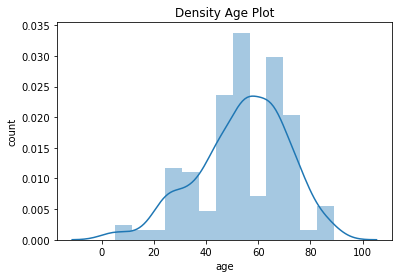

In [363]:
sns.distplot(covid19_data['age'])
plt.ylabel('count')
plt.title('Density Age Plot')
plt.savefig('Density Age Plot')

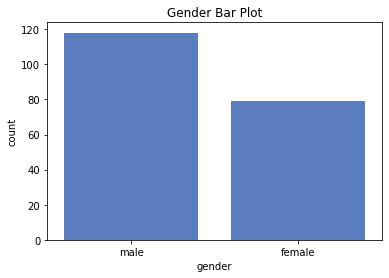

In [38]:
sns.set_color_codes('muted')
sns.countplot(x='gender', data=covid19_data, color='b')
plt.title('Gender Bar Plot')
plt.savefig('Gender Bar Plot')
plt.show()

In [29]:
covid19_data['gender'].value_counts()

male      118
female     79
Name: gender, dtype: int64

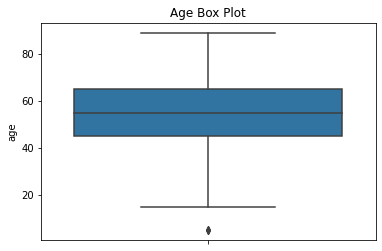

In [364]:
sns.boxplot(y=covid19_data['age'])
plt.title('Age Box Plot')
plt.savefig('Age Box Plot')

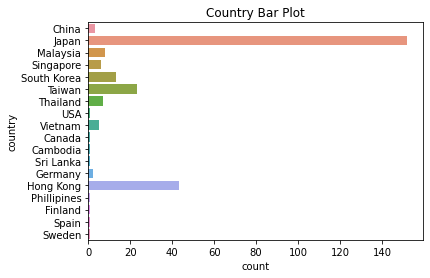

In [4]:
sns.countplot(y='country', data=covid19_data)
plt.title('Country Bar Plot')
plt.savefig('Country Bar Plot', bbox_inches= 'tight')
plt.show()

In [ ]:
covid19_data['symptom'].astype('category').value_counts()

fever                                      61
fever, cough                               28
cough                                       8
fever, malaise                              5
fever, sore throat                          5
                                           ..
fever, breathlessness, malaise              1
fever, abdominal pain, diarrhea             1
feve\                                       1
fatigue, muscle pain, joint pain, fever     1
vomiting, diarrhea, fever, cough            1
Name: symptom, Length: 83, dtype: int64

In [40]:
covid19_data_symptom=covid19_data.loc[(covid19_data['symptom']=='fever')|(covid19_data['symptom']=='fever, cough')|(covid19_data['symptom']=='cough')|(covid19_data['symptom']=='fever, malaise')]

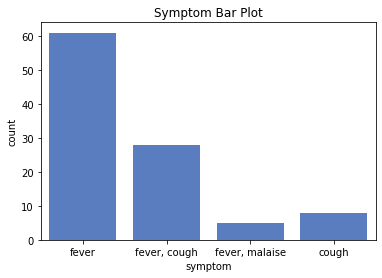

In [42]:
sns.set_color_codes('muted')
sns.countplot(x='symptom', data=covid19_data_symptom, color='b')
plt.title('Symptom Bar Plot')
plt.savefig('Symptom Bar Plot')
plt.show()